In [1]:
import pandas as pd

df=pd.read_csv('bmi.csv')
df=df.head(100)
df

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
95,136,51,fat
96,131,37,normal
97,180,75,normal
98,191,60,thin


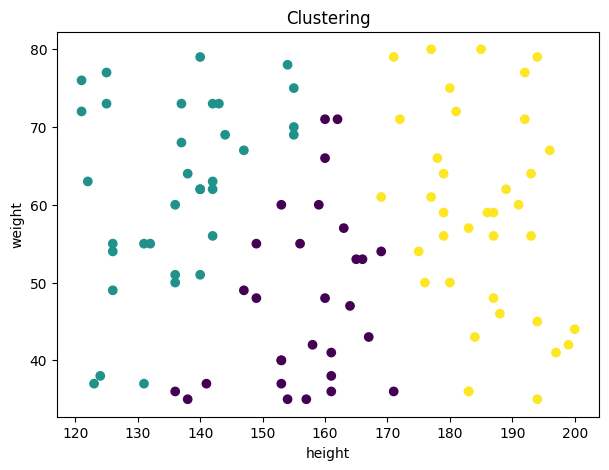

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=20)
km.fit(df.iloc[:, :2])
y_pred = km.predict(df.iloc[:, :2]) 
plt.figure(figsize=(7,5))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_pred) 
plt.title('Clustering')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [5]:
df["cluster_id"]=y_pred
df

,height,weight,label,cluster_id
0,142,62,fat,1
1,142,73,fat,1
2,177,61,normal,2
3,187,48,thin,2
4,153,60,fat,0
...,...,...,...,...
95,136,51,fat,1
96,131,37,normal,1
97,180,75,normal,2
98,191,60,thin,2


In [6]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
tbl=pd.read_csv('bmi.csv')
tbl

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [8]:
df=tbl.iloc[:100,:-1]
df

,height,weight
0,142,62
1,142,73
2,177,61
3,187,48
4,153,60
...,...,...
95,136,51
96,131,37
97,180,75
98,191,60


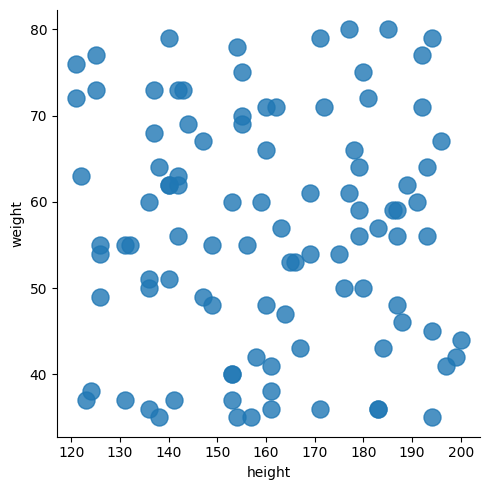

In [12]:
sns.lmplot(x='height',y= 'weight', data=df, fit_reg=False, scatter_kws={"s":150})

In [14]:
data_points=df.values
data_points

array([[142,  62],
       [142,  73],
       [177,  61],
       [187,  48],
       [153,  60],
       [186,  59],
       [166,  53],
       [193,  56],
       [184,  43],
       [193,  64],
       [155,  69],
       [142,  63],
       [181,  72],
       [189,  62],
       [140,  62],
       [153,  37],
       [131,  55],
       [137,  68],
       [153,  40],
       [136,  50],
       [125,  73],
       [192,  71],
       [147,  49],
       [161,  36],
       [172,  71],
       [143,  73],
       [187,  56],
       [140,  51],
       [121,  72],
       [183,  36],
       [163,  57],
       [160,  48],
       [124,  38],
       [176,  50],
       [197,  41],
       [140,  79],
       [158,  42],
       [132,  55],
       [126,  49],
       [136,  36],
       [175,  54],
       [196,  67],
       [138,  64],
       [123,  37],
       [194,  35],
       [169,  54],
       [149,  55],
       [194,  45],
       [156,  55],
       [164,  47],
       [179,  56],
       [185,  80],
       [183,

In [20]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3, init='random').fit(data_points)

In [21]:
km.cluster_centers_

array([[139.73529412,  65.32352941],
       [152.14285714,  43.53571429],
       [184.71052632,  58.28947368]])

In [22]:
km.labels_

array([0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2,
       1, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 2, 0, 1,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1,
       1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0], dtype=int32)

In [24]:
df["cluster_id"]=km.labels_
df

,height,weight,cluster_id
0,142,62,0
1,142,73,0
2,177,61,2
3,187,48,2
4,153,60,0
...,...,...,...
95,136,51,0
96,131,37,1
97,180,75,2
98,191,60,2


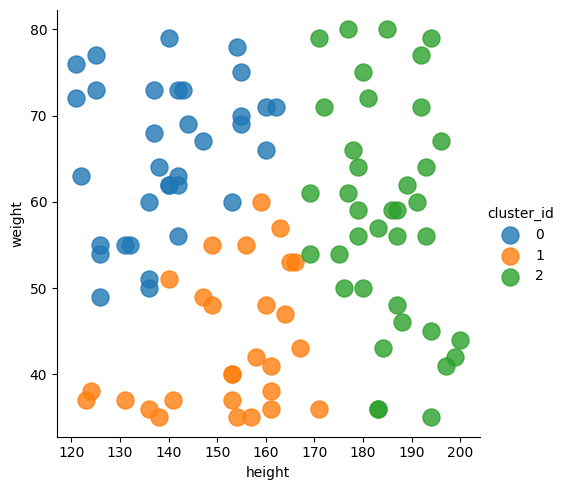

In [31]:
sns.lmplot(x='height',y= 'weight', data=df, fit_reg=False, scatter_kws={"s":150}, hue='cluster_id' )